In [90]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=yf.download("AAPL",period="6mo")
df.to_csv("apple_stock.csv")
print(df)
print("\nWhat columns do we have?")
print(df.columns)

print("\nBasic info about the data:")
print(df.info())

/tmp/ipykernel_79926/692796767.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download("AAPL",period="1mo")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-06-26  201.000000  202.639999  199.460007  201.429993  50799100
2025-06-27  201.080002  203.220001  200.000000  201.889999  73188600
2025-06-30  205.169998  207.389999  199.259995  202.009995  91912800
2025-07-01  207.820007  210.190002  206.139999  206.669998  78788900
2025-07-02  212.440002  213.339996  208.139999  208.910004  67941800
2025-07-03  213.550003  214.649994  211.809998  212.149994  34955800
2025-07-07  209.949997  216.229996  208.800003  212.679993  50229000
2025-07-08  210.009995  211.429993  208.449997  210.100006  42848900
2025-07-09  211.139999  211.330002  207.220001  209.529999  48749400
2025-07-10  212.410004  213.479996  210.029999  210.509995  44443600
2025-07-11  211.160004  212.130005  209.860001  210.570007  39765800
2025-07-14  208.619995  210.910004

In [91]:
X=df[['Open','High','Low','Volume']]
Y=df['Close']
print(X.head(3))
print(Y.head(3))

Price             Open        High         Low    Volume
Ticker            AAPL        AAPL        AAPL      AAPL
Date                                                    
2025-06-26  201.429993  202.639999  199.460007  50799100
2025-06-27  201.889999  203.220001  200.000000  73188600
2025-06-30  202.009995  207.389999  199.259995  91912800
Ticker            AAPL
Date                  
2025-06-26  201.000000
2025-06-27  201.080002
2025-06-30  205.169998


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(f"Training features: {X_train.shape}")
print(f"Training target: {Y_train.shape}")
print(f"Testing features: {X_test.shape}")
print(f"Testing target: {Y_test.shape}")

Training features: (16, 4)
Training target: (16, 1)
Testing features: (5, 4)
Testing target: (5, 1)


In [93]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
print('Model trained successfully')

Model trained successfully


In [94]:
predictions=model.predict(X_test)
print("Predictions are made")
print(predictions[:5])

Predictions are made
[[202.17094131]
 [213.16445271]
 [210.84646642]
 [203.34819918]
 [209.05416407]]


In [95]:
comparison = pd.DataFrame({"Actual close": Y_test.values.flatten(),
                          "Predicted close": predictions.flatten()})
print("Comparison (Actual vs Predicted):")
print(comparison.head(10))

Comparison (Actual vs Predicted):
   Actual close  Predicted close
0    201.000000       202.170941
1    214.399994       213.164453
2    211.179993       210.846466
3    201.080002       203.348199
4    211.139999       209.054164


In [96]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,predictions)
r2=r2_score(Y_test,predictions)
if r2 > 0.8:
    print(" Excellent model!")
elif r2 > 0.5:
    print(" Good model!")
else:
    print(" Model needs improvement (expected for stock data)")

 Excellent model!


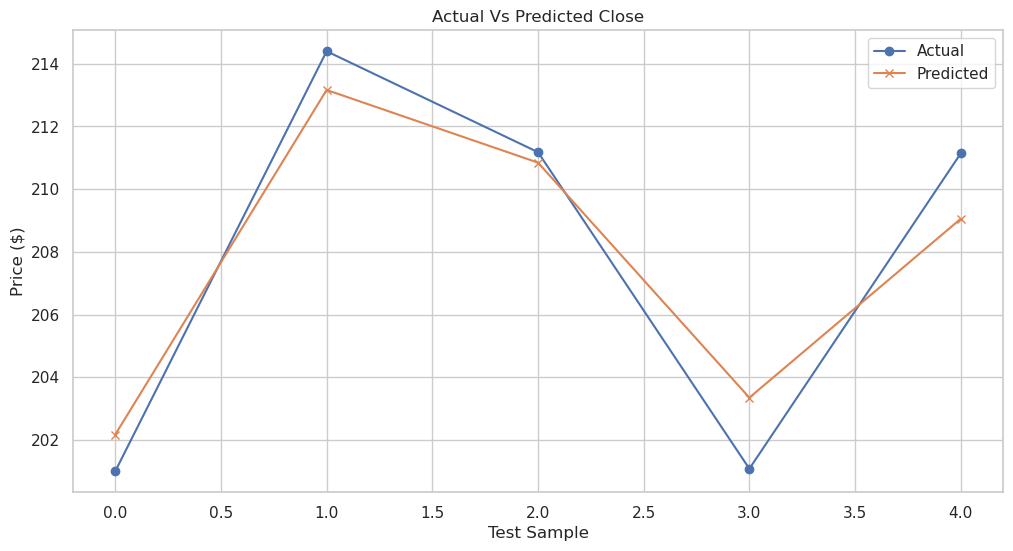

In [97]:
sns.set_theme(style='whitegrid',palette="deep")
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(comparison['Actual close'],label='Actual',marker='o')
ax.plot(comparison['Predicted close'],label='Predicted',marker='x')
ax.set_title("Actual Vs Predicted Close")
ax.set_xlabel('Test Sample')
ax.set_ylabel('Price ($)')
ax.legend()
plt.show()